# Esempio: Generazione Immagine Cerchio

bu chissa

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

In [4]:
theta = np.linspace(0, 2 * np.pi, 1000)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

In [5]:
rng = np.random.default_rng()

In [6]:
x = rng.uniform(-1, 1, 1000)
y = rng.uniform(-1, 1, 1000)

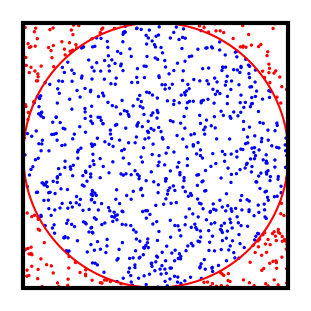

In [19]:
fig, ax = plt.subplots(figsize=(3, 3), layout="constrained")
plt.plot(x_circle, y_circle, lw=1.5, c="r", zorder=2)
colors = np.where(x**2 + y**2 < 1, "b", "r")
plt.scatter(x, y, c=colors, s=2, zorder=1)
rect = Rectangle((-1, -1), 2, 2, lw=3, ec="k", fc="None", zorder=3)
ax.add_patch(rect)
plt.axis("off")
plt.savefig("images/monte_carlo.png", dpi=100)